In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
import streamlit as st

In [2]:
warnings.filterwarnings(action='ignore', message='All-NaN slice encountered')

In [3]:
topsubscribed_df =pd.read_csv("topSubscribed.csv")
topsubscribed_df


,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012
...,...,...,...,...,...,...,...
995,996,XO TEAM,"11,500,000","11,471,384,709","2,679",People & Blogs,2021
996,997,Nirahua Music World,"11,500,000","5,997,717,755",788,Music,2014
997,998,YtCrash,"11,400,000","3,825,084",1,Education,2015
998,999,Painzeiro,"11,400,000","2,143,444,281",946,People & Blogs,2015


In [4]:
topsubscribed_df.dtypes

Rank                int64
Youtube Channel    object
Subscribers        object
Video Views        object
Video Count        object
Category           object
Started             int64
dtype: object

In [5]:
#The isnull() method returns a DataFrame object where all the values are replaced with a 
#Boolean value True for NULL values, and otherwise False.
pd.isnull(topsubscribed_df)

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False


In [6]:
#Change column name
topsubscribed_df.rename({'Video Views': 'VideoViews'}, axis=1, inplace=True)

In [7]:
#change category name
topsubscribed_df = topsubscribed_df.replace('https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels','Unknown')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [8]:
#remove commas from columns

topsubscribed_df['Subscribers']=topsubscribed_df['Subscribers'].str.replace(',','')
topsubscribed_df['VideoViews']=topsubscribed_df['VideoViews'].str.replace(',','')
topsubscribed_df['Video Count']=topsubscribed_df['Video Count'].str.replace(',','')

In [9]:
topsubscribed_df

,Rank,Youtube Channel,Subscribers,VideoViews,Video Count,Category,Started
0,1,T-Series,234000000,212900271553,18515,Music,2006
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
3,4,SET India,150000000,137828094104,103200,Shows,2006
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012
...,...,...,...,...,...,...,...
995,996,XO TEAM,11500000,11471384709,2679,People & Blogs,2021
996,997,Nirahua Music World,11500000,5997717755,788,Music,2014
997,998,YtCrash,11400000,3825084,1,Education,2015
998,999,Painzeiro,11400000,2143444281,946,People & Blogs,2015


In [10]:
topsubscribed_df['Subscribers'] = topsubscribed_df['Subscribers'].astype('int64')
topsubscribed_df['VideoViews'] = topsubscribed_df['VideoViews'].astype('int64')
topsubscribed_df['Video Count'] = topsubscribed_df['Video Count'].astype('int64')

In [11]:
topsubscribed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   int64 
 3   VideoViews       1000 non-null   int64 
 4   Video Count      1000 non-null   int64 
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 54.8+ KB


In [12]:
#How many zeros is each column, Axis=1 to see how many zeros in rows
(topsubscribed_df == 0).sum(axis=0)

Rank               0
Youtube Channel    0
Subscribers        0
VideoViews         9
Video Count        9
Category           0
Started            0
dtype: int64

In [13]:
#how many null values in dataframe, there's none so there's no point in dropping rows with null values
pd.isnull(topsubscribed_df).sum()

Rank               0
Youtube Channel    0
Subscribers        0
VideoViews         0
Video Count        0
Category           0
Started            0
dtype: int64

In [14]:
#delete rows where there's at least a 0
topsubscribed_df=topsubscribed_df[(topsubscribed_df != 0).all(1)]

In [15]:
#view df after removing rows with zeros
topsubscribed_df

,Rank,Youtube Channel,Subscribers,VideoViews,Video Count,Category,Started
0,1,T-Series,234000000,212900271553,18515,Music,2006
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
3,4,SET India,150000000,137828094104,103200,Shows,2006
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012
6,7,PewDiePie,111000000,28851883250,4694,Gaming,2010
...,...,...,...,...,...,...,...
995,996,XO TEAM,11500000,11471384709,2679,People & Blogs,2021
996,997,Nirahua Music World,11500000,5997717755,788,Music,2014
997,998,YtCrash,11400000,3825084,1,Education,2015
998,999,Painzeiro,11400000,2143444281,946,People & Blogs,2015


In [16]:
#head() returns the first n rows(observe the index values)
topsubscribed_df.head()

,Rank,Youtube Channel,Subscribers,VideoViews,Video Count,Category,Started
0,1,T-Series,234000000,212900271553,18515,Music,2006
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
3,4,SET India,150000000,137828094104,103200,Shows,2006
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012
6,7,PewDiePie,111000000,28851883250,4694,Gaming,2010


In [17]:
#tail() returns the last n rows(observe the index values)
topsubscribed_df.tail()

,Rank,Youtube Channel,Subscribers,VideoViews,Video Count,Category,Started
995,996,XO TEAM,11500000,11471384709,2679,People & Blogs,2021
996,997,Nirahua Music World,11500000,5997717755,788,Music,2014
997,998,YtCrash,11400000,3825084,1,Education,2015
998,999,Painzeiro,11400000,2143444281,946,People & Blogs,2015
999,1000,Oum Walid,11400000,2480064722,1598,People & Blogs,2015


In [18]:
#how many rows and columns
topsubscribed_df.shape

(991, 7)

In [19]:
# describe() returns a description of the data in the DataFrame
topsubscribed_df.describe()

,Rank,Subscribers,VideoViews,Video Count,Started
count,991.000000,9.910000e+02,9.910000e+02,991.000000,991.000000
mean,502.861756,2.121251e+07,1.008568e+10,9501.743693,2012.593340
std,287.500342,1.553235e+07,1.302932e+10,32324.321451,4.122017
min,1.000000,1.140000e+07,4.390980e+05,1.000000,1970.000000
25%,254.500000,1.335000e+07,3.959370e+09,380.000000,2010.000000
50%,503.000000,1.660000e+07,6.767680e+09,906.000000,2013.000000
75%,751.500000,2.305000e+07,1.226927e+10,3311.000000,2015.000000
max,1000.000000,2.340000e+08,2.129003e+11,342802.000000,2021.000000


In [20]:
#count the repeated rows
topsubscribed_df.duplicated().sum()

0

In [21]:
#reset the index
topsubscribed_df.reset_index(drop=True, inplace=True)

In [22]:
#creo colonna range_subs 
topsubscribed_df=topsubscribed_df.assign(range_subs=0)
topsubscribed_df.range_subs = topsubscribed_df.range_subs.astype(str)

In [23]:
#replace the range_subs value with the right subscriber range
for i in range ((len(topsubscribed_df["Subscribers"]))):
    if (topsubscribed_df.at[(i),'Subscribers'] > 10000000) and (topsubscribed_df.at[(i),'Subscribers'] <= 15000000):
        topsubscribed_df.at[(i),'range_subs']= '10M - 15M'
    elif (topsubscribed_df.at[(i),'Subscribers'] > 15000000) and (topsubscribed_df.at[(i),'Subscribers'] <= 20000000):
        topsubscribed_df.at[(i),'range_subs']= '15M - 20M'
    elif (topsubscribed_df.at[(i),'Subscribers'] > 20000000) and (topsubscribed_df.at[(i),'Subscribers'] <= 50000000):
        topsubscribed_df.at[(i),'range_subs']= '20M - 50M'
    elif (topsubscribed_df.at[(i),'Subscribers'] > 50000000) and (topsubscribed_df.at[(i),'Subscribers'] <= 100000000):
        topsubscribed_df.at[(i),'range_subs']= '50M - 100M'
    elif (topsubscribed_df.at[(i),'Subscribers'] > 100000000) and (topsubscribed_df.at[(i),'Subscribers'] <= 200000000):
        topsubscribed_df.at[(i),'range_subs']= '100M - 200M'
    elif (topsubscribed_df.at[(i),'Subscribers'] > 20000000):
        topsubscribed_df.at[(i),'range_subs']= '200M+'

    

In [24]:
#drop column where the 'started' value is <2005 because YT was created in 2005 so the value must be wrong
topsubscribed_df = topsubscribed_df.drop(topsubscribed_df[topsubscribed_df['Started'] < 2005].index)

In [25]:
topsubscribed_df

,Rank,Youtube Channel,Subscribers,VideoViews,Video Count,Category,Started,range_subs
0,1,T-Series,234000000,212900271553,18515,Music,2006,200M+
1,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006,100M - 200M
2,4,SET India,150000000,137828094104,103200,Shows,2006,100M - 200M
3,5,MrBeast,128000000,21549128785,733,Entertainment,2012,100M - 200M
4,7,PewDiePie,111000000,28851883250,4694,Gaming,2010,100M - 200M
...,...,...,...,...,...,...,...,...
986,996,XO TEAM,11500000,11471384709,2679,People & Blogs,2021,10M - 15M
987,997,Nirahua Music World,11500000,5997717755,788,Music,2014,10M - 15M
988,998,YtCrash,11400000,3825084,1,Education,2015,10M - 15M
989,999,Painzeiro,11400000,2143444281,946,People & Blogs,2015,10M - 15M


In [26]:
#how many YT channels in each subscriber range group
topsubscribed_df.groupby(['range_subs']).size().sort_values(ascending = False)

range_subs
10M - 15M      406
20M - 50M      286
15M - 20M      260
50M - 100M      31
100M - 200M      6
200M+            1
dtype: int64

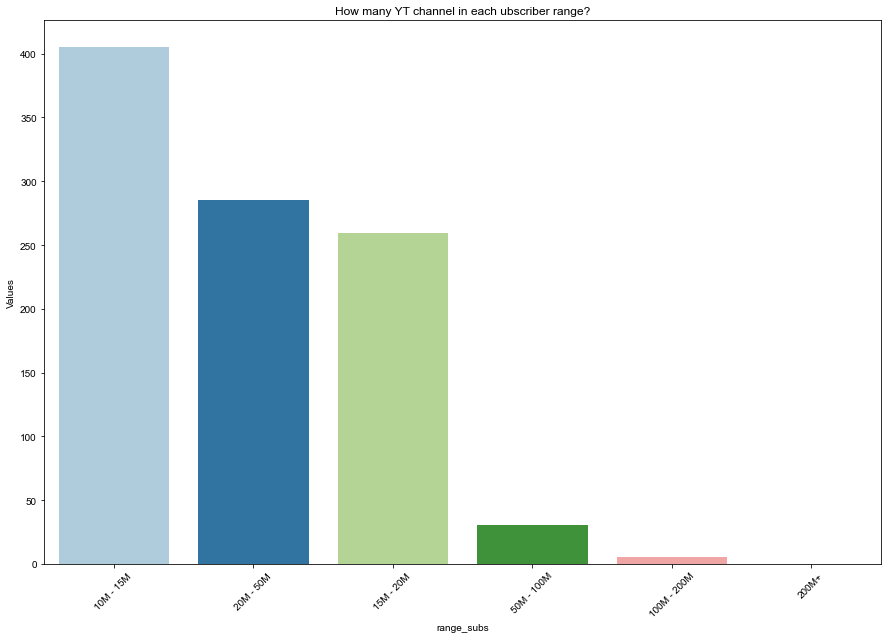

In [27]:
#represent the data above

plt.figure(figsize=(15,10))
plt.title('How many YT channel in each ubscriber range?')
sns.set_style('whitegrid')
m = sns.barplot(x=topsubscribed_df['range_subs'].value_counts().index, y=topsubscribed_df['range_subs'].value_counts(), palette ='Paired')
m.set_xticklabels(topsubscribed_df['range_subs'].value_counts().index, rotation = 45)
m.set(xlabel ='range_subs', ylabel = 'Values')
plt.show()

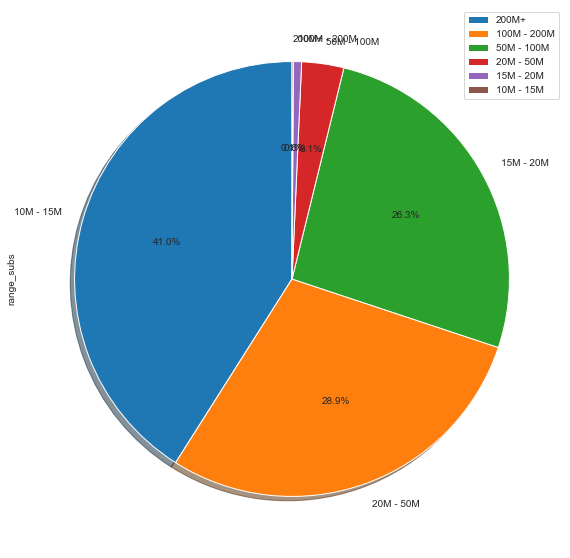

In [28]:
#show results with a pie chart
plt.figure(figsize=(15,10))
pie_chart = topsubscribed_df['range_subs'].value_counts()
pie = pie_chart.plot.pie(shadow=True, startangle=90,autopct='%1.1f%%')
plt.legend(topsubscribed_df['range_subs'].unique())
plt.show()

In [29]:
#how many of these youtubers joined yt each year
annual_join = topsubscribed_df.groupby(['Started']).size().reset_index().rename(columns = {0:'Counts'})
annual_join


,Started,Counts
0,2005,21
1,2006,68
2,2007,45
3,2008,45
4,2009,59
5,2010,45
6,2011,87
7,2012,81
8,2013,82
9,2014,120


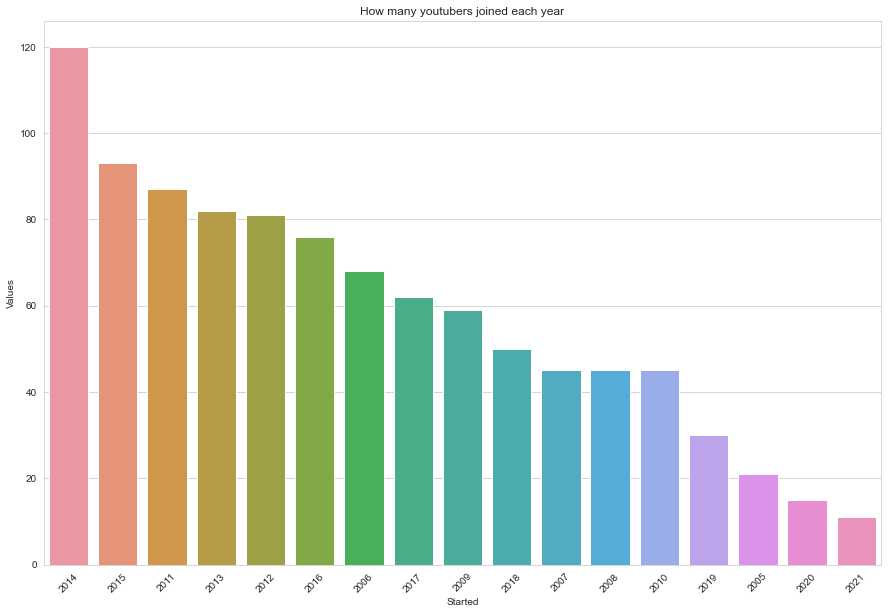

In [30]:
#represent the data

plt.figure(figsize=(15,10))
plt.title('How many youtubers joined each year')
sns.set_style('whitegrid')
a=sns.barplot(x=topsubscribed_df['Started'].value_counts().sort_index().index, y=topsubscribed_df['Started'].value_counts())
a.set_xticklabels(topsubscribed_df['Started'].value_counts().index, rotation = 45)
a.set(xlabel ='Started', ylabel = 'Values')
plt.show()

In [31]:
#how many YT channels in each category
topsubscribed_df.groupby(['Category']).size().reset_index().rename(columns = {0:'Counts'})
  

,Category,Counts
0,Autos & Vehicles,1
1,Comedy,68
2,Education,45
3,Entertainment,238
4,Film & Animation,48
5,Gaming,94
6,Howto & Style,43
7,Movies,2
8,Music,217
9,News & Politics,26


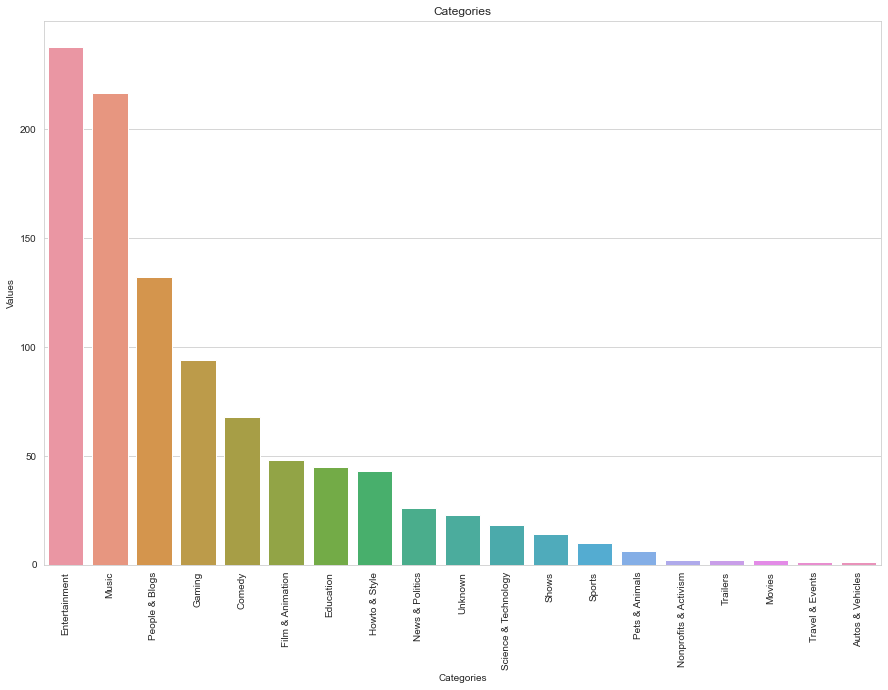

In [32]:
#represent the data

plt.figure(figsize=(15,10))
plt.title('Categories')
sns.set_style('whitegrid')
n = sns.barplot(x=topsubscribed_df['Category'].value_counts().sort_index().index, y=topsubscribed_df['Category'].value_counts())
n.set_xticklabels(topsubscribed_df['Category'].value_counts().index, rotation = 90)
n.set(xlabel ='Categories', ylabel = 'Values')
plt.show()

In [33]:
#how many views for each category
topsubscribed_df.groupby("Category")["VideoViews"].sum().sort_values(ascending=False)



Category
Music                    3058929450985
Entertainment            2218980613268
People & Blogs           1108132436989
Gaming                    671374062722
Education                 638114991185
Film & Animation          518043392749
Comedy                    424592260530
Shows                     419888740161
News & Politics           249736876791
Howto & Style             195253359938
Unknown                   179830796038
Sports                    128316925963
Science & Technology       65995683200
Pets & Animals             47949782238
Trailers                   32270187477
Movies                     14206569027
Nonprofits & Activism       9693759464
Autos & Vehicles            7666147546
Travel & Events             2955450684
Name: VideoViews, dtype: int64

In [34]:
#mean views for each category
topsubscribed_df.groupby("Category")["VideoViews"].mean().sort_values(ascending=False)

Category
Shows                    2.999205e+10
Trailers                 1.613509e+10
Education                1.418033e+10
Music                    1.409645e+10
Sports                   1.283169e+10
Film & Animation         1.079257e+10
News & Politics          9.605264e+09
Entertainment            9.323448e+09
People & Blogs           8.394943e+09
Pets & Animals           7.991630e+09
Unknown                  7.818730e+09
Autos & Vehicles         7.666148e+09
Gaming                   7.142277e+09
Movies                   7.103285e+09
Comedy                   6.244004e+09
Nonprofits & Activism    4.846880e+09
Howto & Style            4.540776e+09
Science & Technology     3.666427e+09
Travel & Events          2.955451e+09
Name: VideoViews, dtype: float64

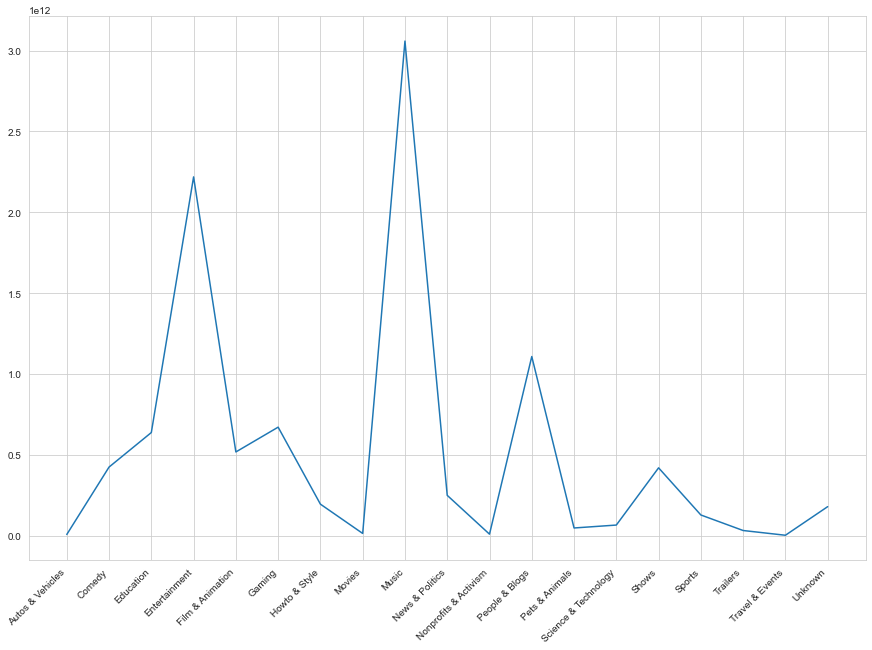

In [35]:
#how views change depending on the category
plt.figure(figsize=(15,10))
plt.plot(topsubscribed_df.groupby("Category")["VideoViews"].sum())
plt.xticks(rotation=45, ha='right')
plt.show()

range_subs
10M - 15M      3511505
20M - 50M      2870619
15M - 20M      2222598
50M - 100M      681088
100M - 200M     111283
200M+            18515
Name: Video Count, dtype: int64


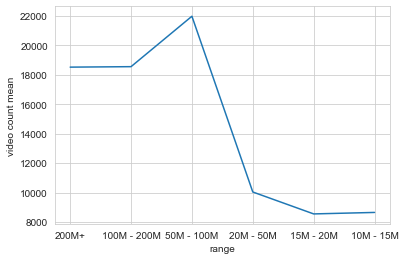

In [36]:
#average video count for each subscriber range and show the esults
print(topsubscribed_df.groupby('range_subs')["Video Count"].sum().sort_values(ascending=False))


fig, ax = plt.subplots()
ax.plot(topsubscribed_df['range_subs'].unique(), topsubscribed_df.groupby(topsubscribed_df['range_subs'])['Video Count'].transform('mean').unique())
ax.set_xlabel('range')
ax.set_ylabel('video count mean')
plt.show()

[2.12900272e+11 8.51924652e+10 3.64896714e+10 1.39733853e+10
 7.46046286e+09 5.42016770e+09]


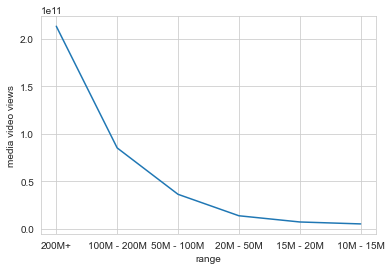

In [37]:
#average video views for each subscriber range and show the results
print( topsubscribed_df.groupby(topsubscribed_df['range_subs'])['VideoViews'].transform('mean').unique())


fig, ax = plt.subplots()
ax.plot(topsubscribed_df['range_subs'].unique(), topsubscribed_df.groupby(topsubscribed_df['range_subs'])['VideoViews'].transform('mean').unique())
ax.set_xlabel("range")
ax.set_ylabel("media video views")
plt.show()

array([[<AxesSubplot:title={'center':'Rank'}>,
        <AxesSubplot:title={'center':'Subscribers'}>],
       [<AxesSubplot:title={'center':'VideoViews'}>,
        <AxesSubplot:title={'center':'Video Count'}>],
       [<AxesSubplot:title={'center':'Started'}>, <AxesSubplot:>]],
      dtype=object)

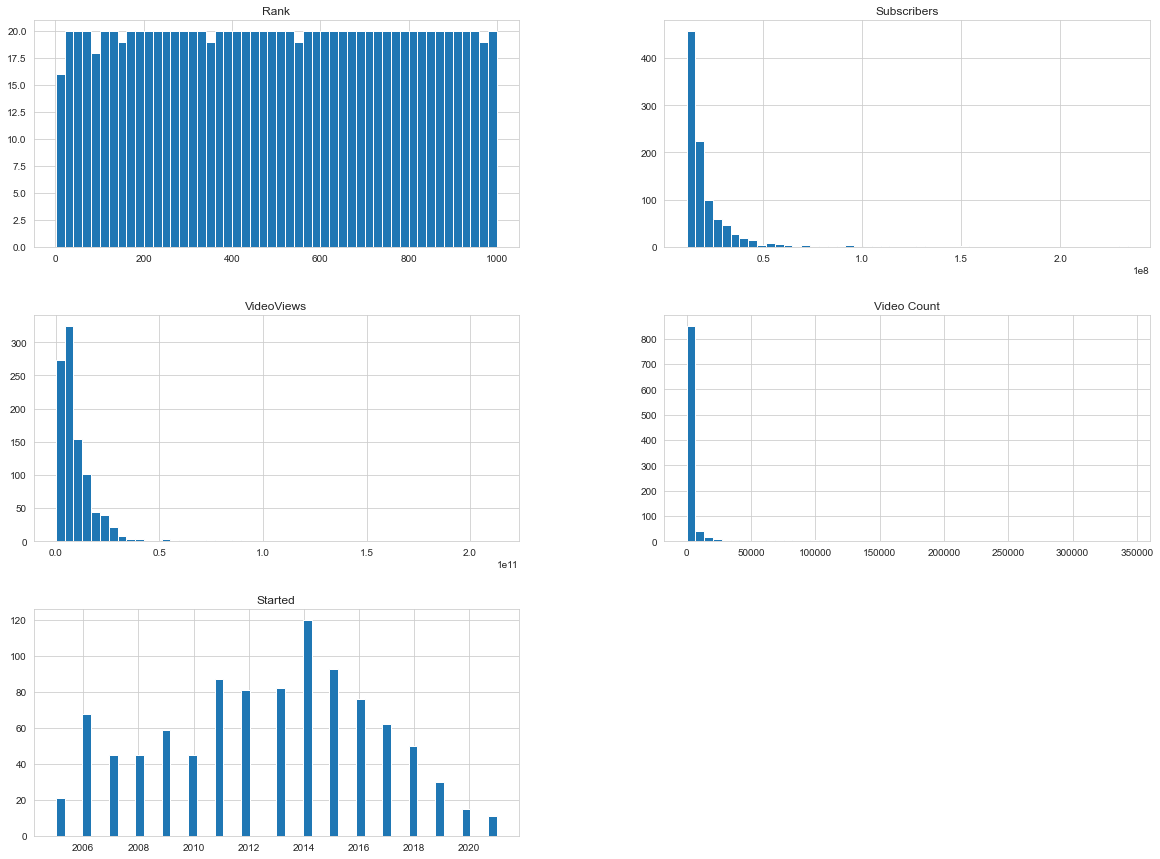

In [38]:
#create hist for each column
topsubscribed_df.hist(figsize=(20,15), bins=50)

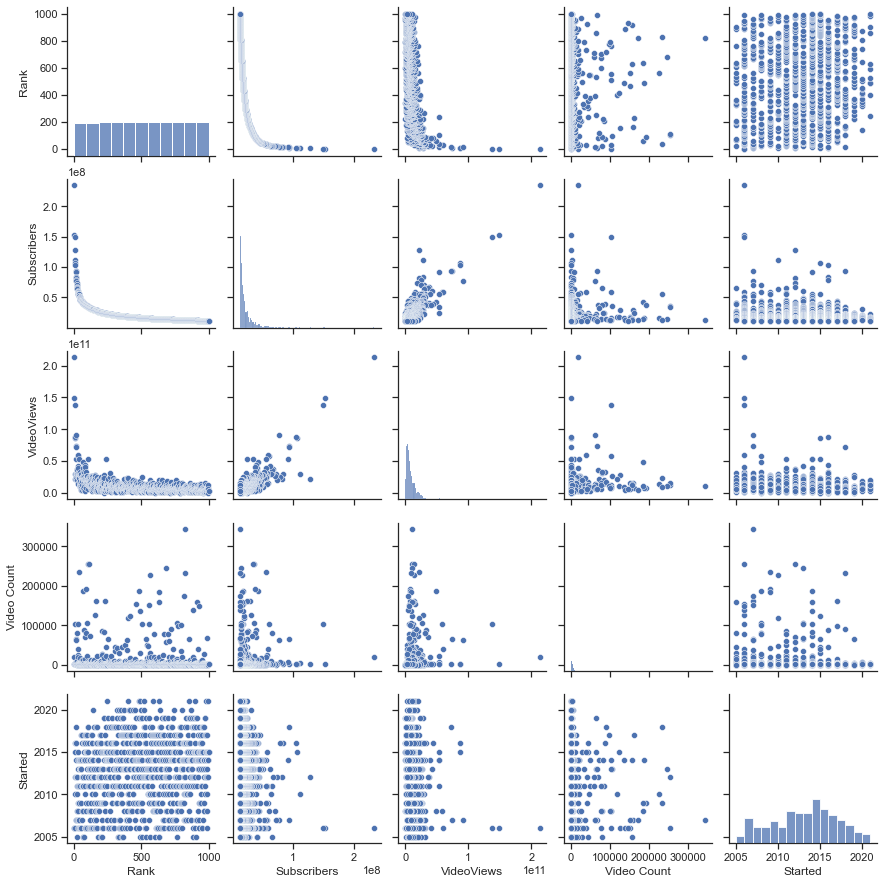

In [39]:
#Pairplot allows us to plot pairwise relationships between variables within a dataset
sns.set(style="ticks", color_codes=True)    
sns.pairplot(topsubscribed_df)
plt.show()

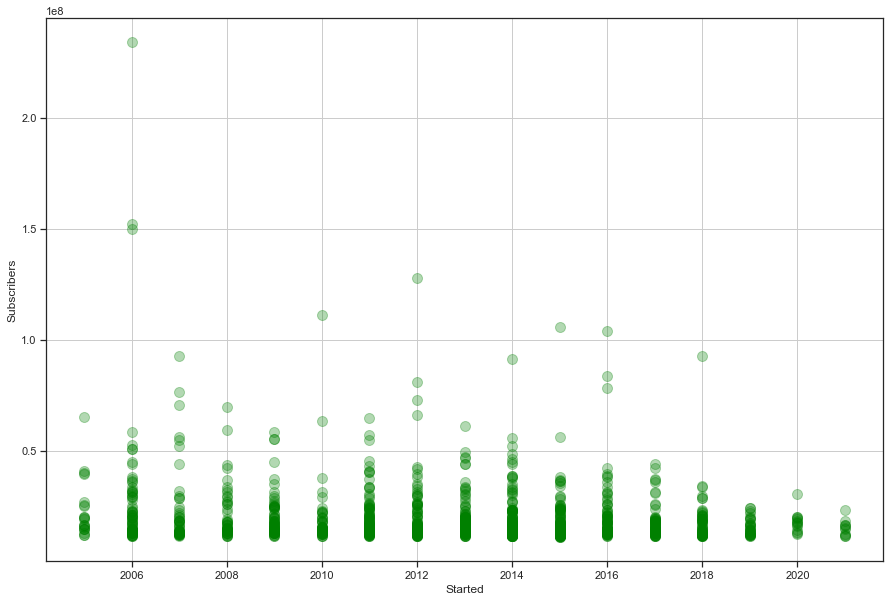

In [40]:
#Subscribers depending on 'started'
plt.figure(figsize=(15,10))
plt.scatter(topsubscribed_df['Started'], topsubscribed_df['Subscribers'], s=100, color='green', alpha=0.3)
plt.xlabel('Started')
plt.ylabel('Subscribers')
plt.grid()
plt.show()

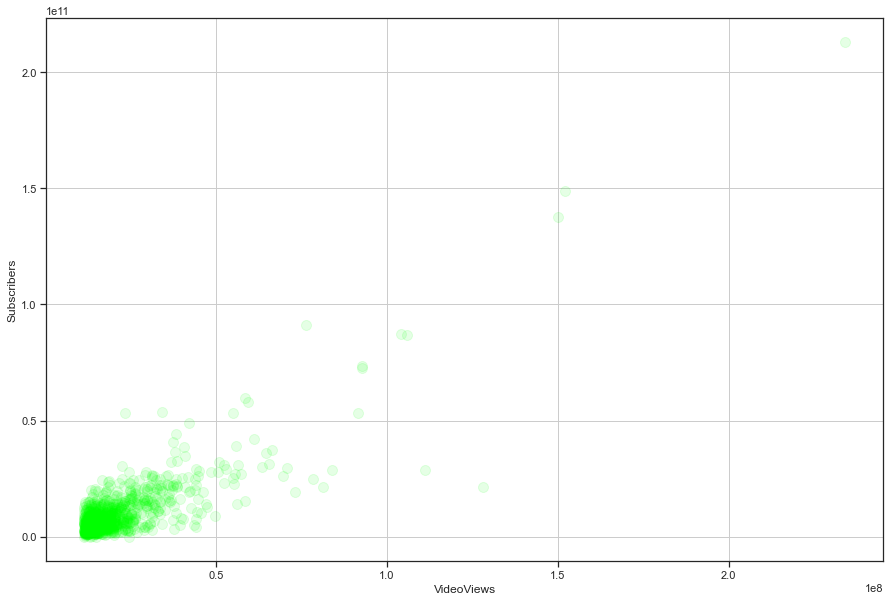

In [41]:
#video views depending on subscribers
plt.figure(figsize=(15,10))
plt.scatter(topsubscribed_df['Subscribers'], topsubscribed_df['VideoViews'],s=100, color='lime', alpha=0.1)
plt.xlabel('VideoViews')
plt.ylabel('Subscribers')
plt.grid()
plt.show()

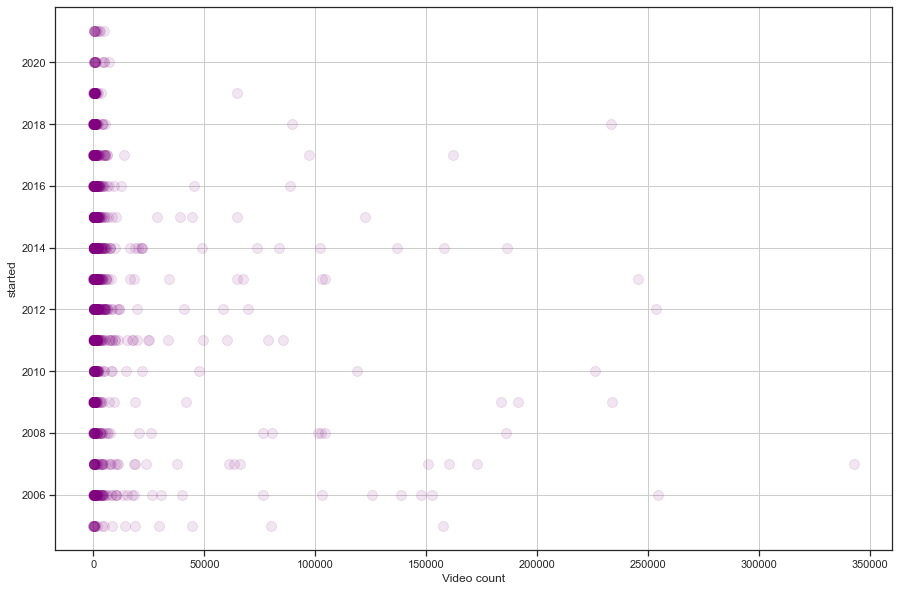

In [42]:
plt.figure(figsize=(15,10))
plt.scatter(topsubscribed_df['Video Count'], topsubscribed_df['Started'],s=100, color='purple', alpha=0.1)
plt.xlabel('Video count')
plt.ylabel('started')
plt.grid()
plt.show()

<AxesSubplot:>

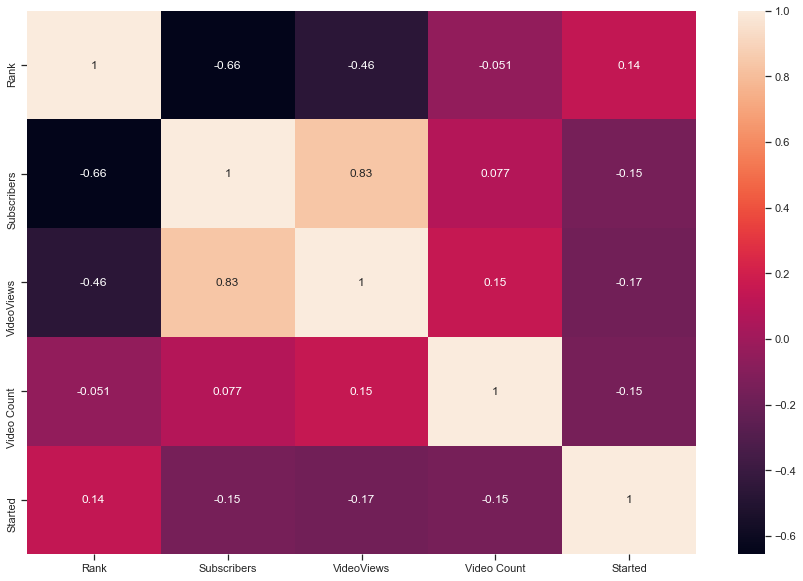

In [43]:
#correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(topsubscribed_df.corr(), annot=True)


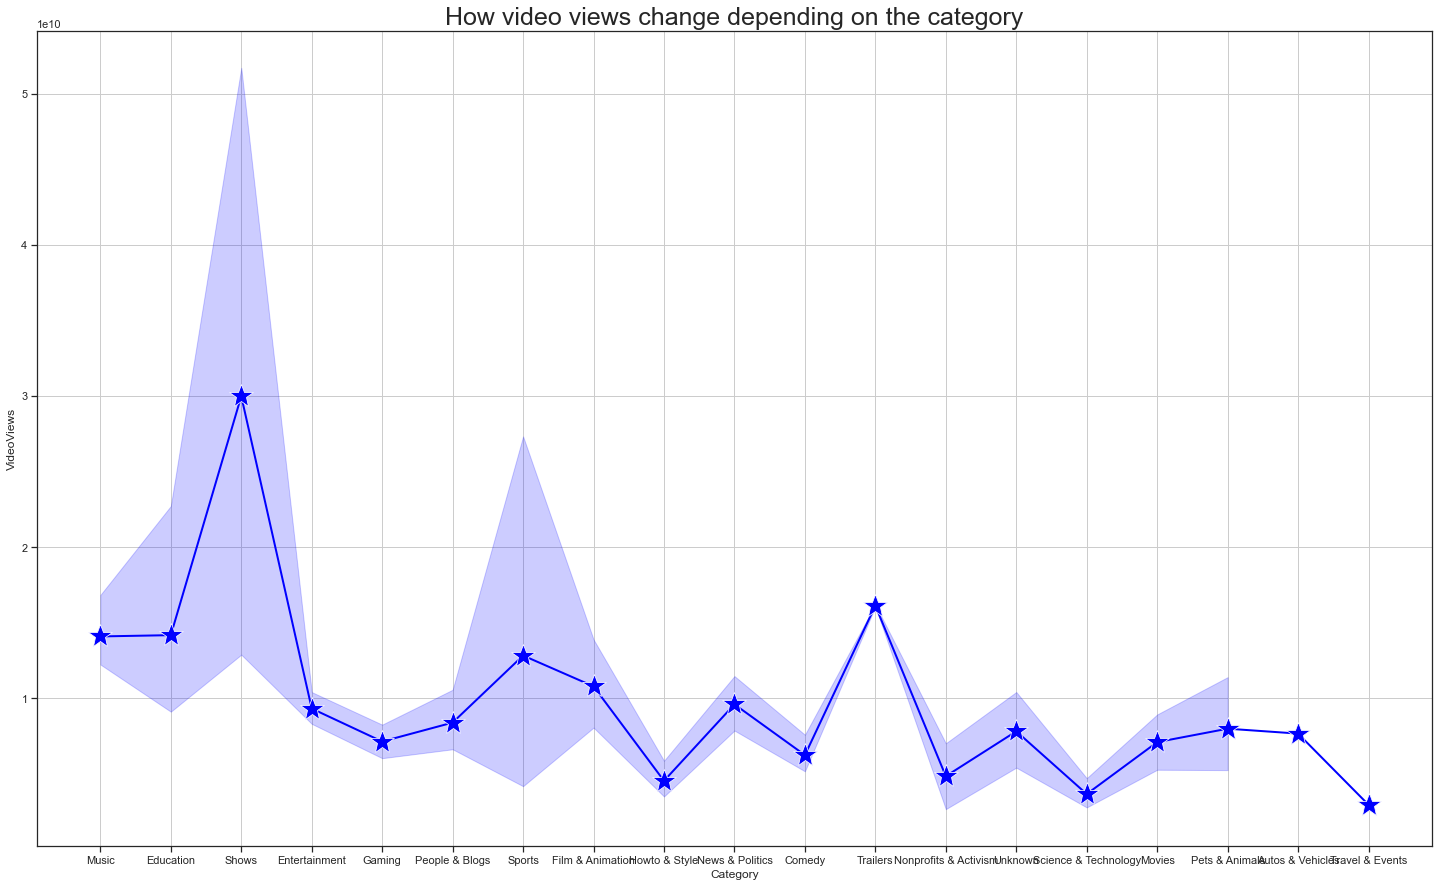

In [44]:
#how video views change depending on the category
plt.figure(figsize=(25,15))
sns.lineplot(x = 'Category', y = 'VideoViews', data=topsubscribed_df,linewidth=2, marker='*',markersize=25, color='blue')
plt.title('How video views change depending on the category', fontsize = 25)
plt.grid()
plt.show()

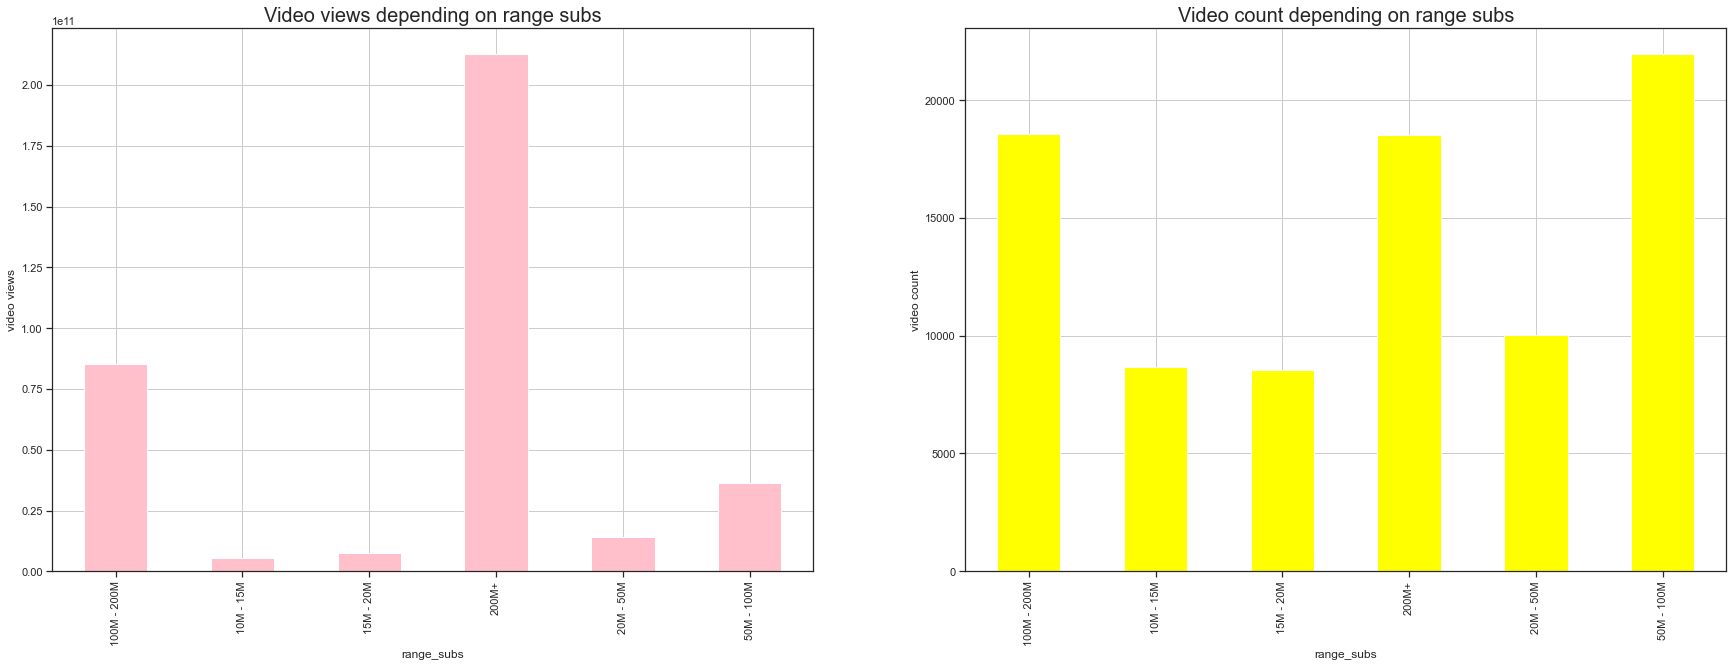

In [45]:
#how the subscriber range affects video views and video count

plt.figure(figsize=(30,10))
plt.subplot(121)

plt.title('Video views depending on range subs',fontsize = 20)
plt.ylabel("video views")
topsubscribed_df.groupby('range_subs')['VideoViews'].mean().sort_index().plot.bar(color = 'pink')
plt.grid()
plt.subplot(122)
plt.title('Video count depending on range subs',fontsize = 20)
plt.ylabel("video count")
topsubscribed_df.groupby('range_subs')['Video Count'].mean().sort_index().plot.bar(color = 'yellow')
plt.grid()
plt.show()


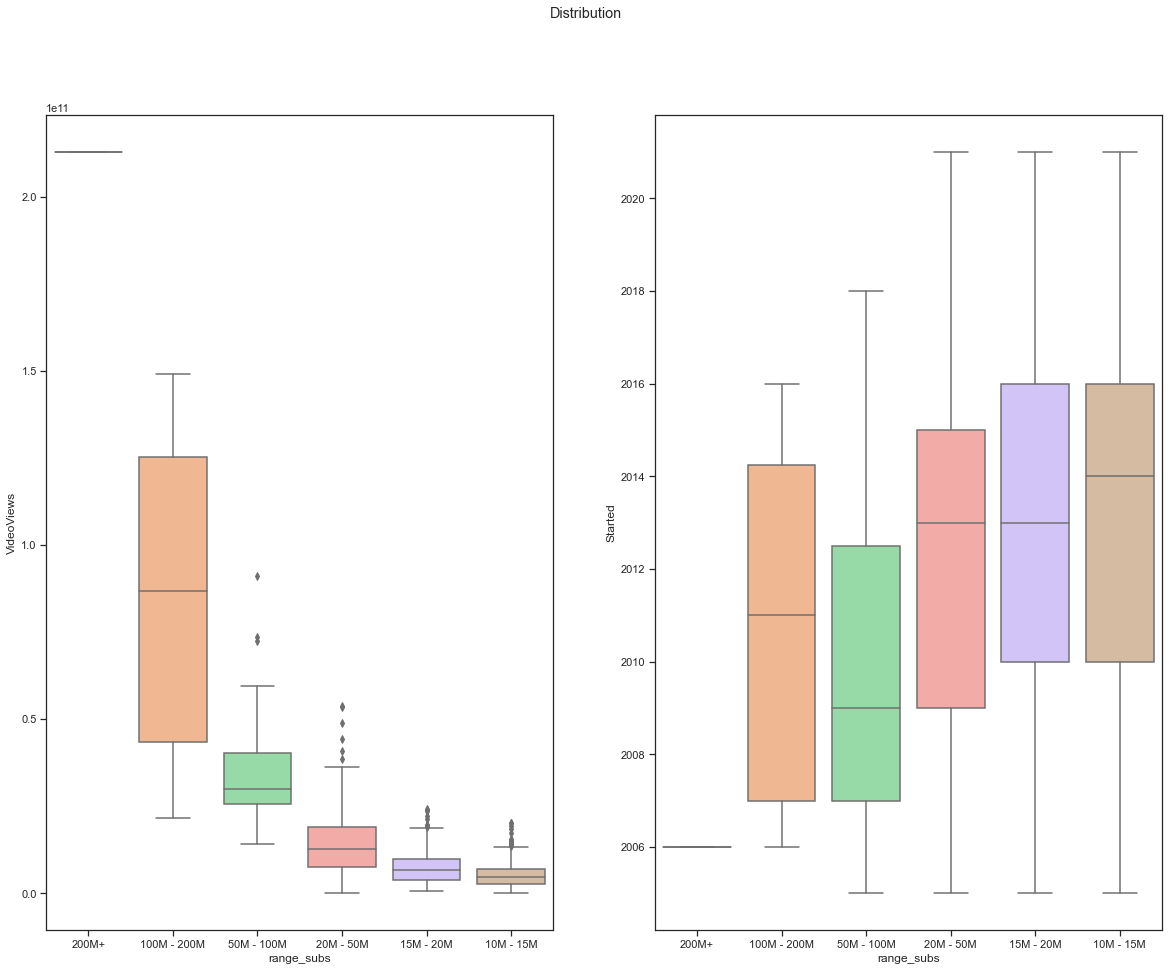

In [46]:
#boxplot
fig, axes = plt.subplots(1,2, figsize=(20, 15))

fig.suptitle('Distribution')

sns.boxplot(ax=axes[ 0], data=topsubscribed_df, x='range_subs', y='VideoViews', palette='pastel')
sns.boxplot(ax=axes[ 1], data=topsubscribed_df, x='range_subs', y='Started', palette='pastel')
plt.show()



In [47]:
#create two new columns
topsubscribed_df = topsubscribed_df.assign(Years_on_YT = 2023 - topsubscribed_df['Started'])
topsubscribed_df = topsubscribed_df.assign(ThirtyM="0")

In [48]:
#drop three columns and create df2
df2 = topsubscribed_df.drop(['Category','Youtube Channel', 'range_subs'], axis=1)
df2

,Rank,Subscribers,VideoViews,Video Count,Started,Years_on_YT,ThirtyM
0,1,234000000,212900271553,18515,2006,17,0
1,3,152000000,149084178448,846,2006,17,0
2,4,150000000,137828094104,103200,2006,17,0
3,5,128000000,21549128785,733,2012,11,0
4,7,111000000,28851883250,4694,2010,13,0
...,...,...,...,...,...,...,...
986,996,11500000,11471384709,2679,2021,2,0
987,997,11500000,5997717755,788,2014,9,0
988,998,11400000,3825084,1,2015,8,0
989,999,11400000,2143444281,946,2015,8,0


In [49]:
#get rid of outliers and create df_filtered
q = df2["Video Count"].quantile(0.75)
q_low = df2["Video Count"].quantile(0.25)
q_hi  = df2["Video Count"].quantile(0.75)

df_filtered = df2[(df2["Video Count"] < q_hi) & (df2["Video Count"] > q_low)]
df_filtered.reset_index(drop=True, inplace=True)
df_filtered

,Rank,Subscribers,VideoViews,Video Count,Started,Years_on_YT,ThirtyM
0,3,152000000,149084178448,846,2006,17,0
1,5,128000000,21549128785,733,2012,11,0
2,8,106000000,86638570921,1056,2015,8,0
3,9,104000000,87202935675,754,2016,7,0
4,12,92700000,72444118381,520,2018,5,0
...,...,...,...,...,...,...,...
489,995,11500000,2780058418,775,2014,9,0
490,996,11500000,11471384709,2679,2021,2,0
491,997,11500000,5997717755,788,2014,9,0
492,999,11400000,2143444281,946,2015,8,0


# Implementation of Gaussian Naive Bayes

In [50]:
#ThirtyM says if someone has at least 30M followers, it takes value 1 if the number of followers is >= 30M, 0 otherwise
for i in range (len(df_filtered['ThirtyM'])):
    if((df_filtered.at[(i), 'Subscribers']) >= 30000000):
        df_filtered.at[(i), 'ThirtyM'] = 1
    else:
        df_filtered.at[(i), 'ThirtyM'] = 0

In [51]:
df_filtered

,Rank,Subscribers,VideoViews,Video Count,Started,Years_on_YT,ThirtyM
0,3,152000000,149084178448,846,2006,17,1
1,5,128000000,21549128785,733,2012,11,1
2,8,106000000,86638570921,1056,2015,8,1
3,9,104000000,87202935675,754,2016,7,1
4,12,92700000,72444118381,520,2018,5,1
...,...,...,...,...,...,...,...
489,995,11500000,2780058418,775,2014,9,0
490,996,11500000,11471384709,2679,2021,2,0
491,997,11500000,5997717755,788,2014,9,0
492,999,11400000,2143444281,946,2015,8,0


<AxesSubplot:>

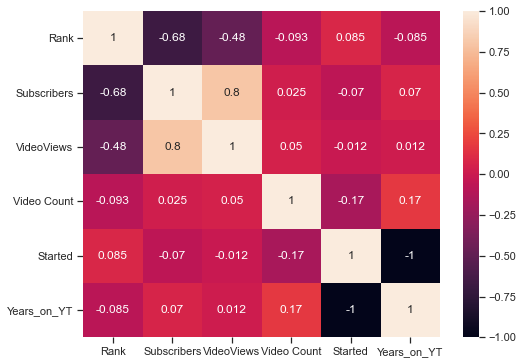

In [52]:
#correlation matrix after filtering the outliers

plt.figure(figsize=(8,6))
sns.heatmap(df_filtered.corr(), annot=True)

In [53]:
#create two df

yes = df_filtered[df_filtered.ThirtyM == 1] # > 30M subs
no = df_filtered[df_filtered.ThirtyM == 0] # < 30M subs   


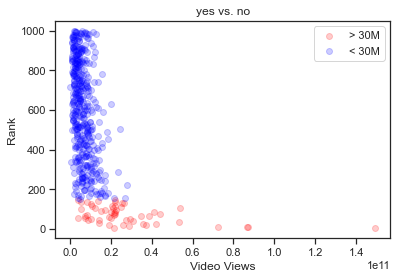

In [54]:
plt.title("yes vs. no")
plt.xlabel("Video Views")
plt.ylabel("Rank")

plt.scatter(yes['VideoViews'],yes['Rank'] , color = "red", label = "> 30M", alpha = 0.2)
plt.scatter(no['VideoViews'],no['Rank'] , color = "blue", label = "< 30M", alpha = 0.2)
plt.legend()
plt.show()

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection  import train_test_split

In [56]:
#We now divide our dataframe into x and y components. The x variable includes all independent predictor factors,
#whereas the y variable provides the diagnostic prediction.

x = df_filtered.drop(["ThirtyM"], axis = 1)
y = df_filtered.ThirtyM.values



In [57]:
#After that, we’ll use the train test split module from the sklearn package to divide the dataset into training and testing sections.
from sklearn.model_selection import train_test_split
y=y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


In [58]:
#Now we’ll import and instantiate the Gaussian Naive Bayes module from SKlearn GaussianNB. To fit the model, we may pass x_train and y_train.
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
print(nb.fit(x_train, y_train))


GaussianNB()


In [59]:
#The following accuracy score reflects how successfully our Sklearn Gaussian Naive Bayes model predicted cancer using the test data.
print("Naive Bayes score: ",nb.score(x_test, y_test))


Naive Bayes score:  0.9463087248322147
